In [1]:
push!(LOAD_PATH, "src");
using BenchmarkTools;
using Colors, Plots;
col = palette(:default);
(cgrad::PlotUtils.ContinuousColorGradient)(xs::Vector{Vector{Float64}}) = [cgrad[x] for x in xs];
(cgrad::PlotUtils.ContinuousColorGradient)(m::Matrix{Float64}) = reshape(cgrad[m[:]], size(m));
using Gen
using GridSlam
using Geometry

[ Info: Precompiling GridSlam [top-level]
[ Info: Precompiling Geometry [top-level]


In [2]:
Pose([0;0],0);
Measurement(1.0,π);

# Line-map w/ Raycaster

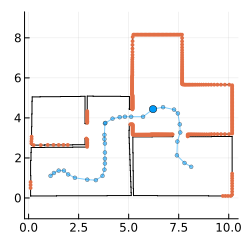

In [4]:
using JLD2
using StatsBase: mean
using Geometry: bounding_box

fname = "data/data_2.jld2"
d = load_object(fname)

segs = env_segs = d[:env][:segs];
center = mean(bounding_box(segs));
    
xs  = d[:motion][:x];
hds = d[:motion][:hd];
ps = [Pose(x,hd) for (x,hd) in zip(xs, hds)];

as   = d[:sensor][:a];
zs   = d[:sensor][:z];
ss   = [Measurement.(z,as) for z in zs]
fov  = d[:sensor][:fov]
zmax = d[:sensor][:zmax]

t = rand(1:length(ps))
# -----------------
plot(size=(250,250), aspect_ratio=:equal, legend=false)
plot!(segs, c=:black)
plot!(xs, marker=:o, label=nothing, markersize=2, c=col[1], alpha=0.5)
scatter!([xs[t]], markersize=4, c=col[1])
scatter!(ps[t], ss[t], markersize=2, alpha=1, markerstrokewidth=0., marker=:o, c=col[2])